In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Create a plot for the costs and tax revenues of smoking

In [3]:
## Numbers in Billion currency (USD, BP and EURO)

### taxes
USA_tax_2018 = 30
Ger_tax_2018 = 14
UK_tax_2018 = 8.8
India_tax_2018 = 2.5

### direct cost
USA_direct_cost = 170  #195.9 billion accounting for inflation since 2006 to 2018
USA_direct_cost_lb = 153.2 #133 billion accounting for inflation since 2006 to 2018
USA_direct_cost_ub = 219 #252.3 billion accounting for inflation since 2006 to 2018
Ger_direct_cost = 26.6 #16.6 accounting for inflation since 1996 to 2018
UK_direct_cost = 2.56 #2.5 accounting for inflation since 2017 to 2018
India_direct_cost = 6.15 #6 accounting for inflation since 2017 to 2018

### indirect cost
USA_indirect_cost = 190.4 #156 accounting for inflation since 2006 to 2018
Ger_indirect_cost = 12 #accounting for inflation since 2003 to 2018
UK_indirect_cost = 8.8 #8.6 accounting for inflation since 2017 to 2018
India_indirect_cost = 22 #21.5 accounting for inflation since 2017 to 2018

### Other estimate
Ger_direct_cost_other = 28 #79*1/3 accounting for inflation since 2015 to 2018
Ger_indirect_cost_other = 55.8 #79*2/3 accounting for inflation since 2015 to 2018

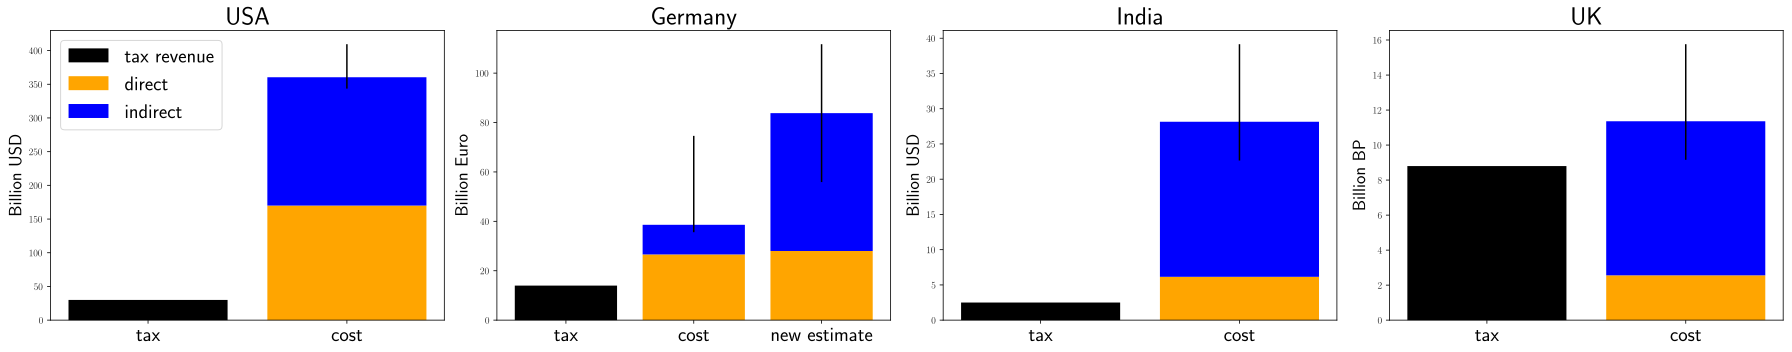

In [5]:
## plot these numbers in four subplots next to each other

fig, ax = plt.subplots(1,4, figsize=(25,5))
xlabelsize = 20
ylabelsize = 18
titlesize = 25
legendsize = 20

# plot USA
x_USA = np.arange(2)
#USA_direct_y = np.array([USA_direct_cost_lb, USA_direct_cost, USA_direct_cost_ub])
#USA_indirect_y = np.array(3*[USA_indirect_cost])
USA_yerr_direct = ([USA_direct_cost - USA_direct_cost_lb], [USA_direct_cost_ub - USA_direct_cost])

ax[0].bar(x_USA[0], USA_tax_2018, color='k', label='tax revenue')
ax[0].bar(x_USA[1], USA_direct_cost, color='orange', label='direct')
ax[0].bar(x_USA[1], USA_indirect_cost, bottom=USA_direct_cost, color='blue', 
          label='indirect', yerr=USA_yerr_direct)
ax[0].set_ylabel('Billion USD', size=ylabelsize)
ax[0].set_title('USA', fontsize=titlesize)
ax[0].set_xticks(x_USA)
ax[0].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
ax[0].legend(prop={'size': legendsize})

# plot Germany
x_Ger = np.arange(3)
Ger_indirect_yerr = ([0.25*Ger_indirect_cost], [3*Ger_indirect_cost])
Ger_indirect_yerr_other = ([0.5*Ger_indirect_cost_other], [0.5*Ger_indirect_cost_other])

ax[1].bar(x_Ger[0], Ger_tax_2018, color='k', label='tax revenue')
ax[1].bar(x_Ger[1], Ger_direct_cost, color='orange', label='direct')
ax[1].bar(x_Ger[1], Ger_indirect_cost, bottom=Ger_direct_cost, color='blue', 
          label='indirect', yerr=Ger_indirect_yerr)
ax[1].bar(x_Ger[2], Ger_direct_cost_other, color='orange')#, label='direct other')
ax[1].bar(x_Ger[2], Ger_indirect_cost_other, bottom=Ger_direct_cost_other,
          color='blue', yerr=Ger_indirect_yerr_other)#, label='indirect other')
ax[1].set_ylabel('Billion Euro', fontsize=ylabelsize)
ax[1].set_title('Germany', fontsize=titlesize)
ax[1].set_xticks(x_Ger)
ax[1].set_xticklabels(['tax', 'cost', 'new estimate'], fontsize=xlabelsize)
#ax[1].legend(loc='upper left', prop={'size': legendsize})

# plot India
x_India = np.arange(2)
India_indirect_yerr = ([0.25*India_indirect_cost], [0.5*India_indirect_cost])

ax[2].bar(x_India[0], India_tax_2018, color='black', label='tax revenue')
ax[2].bar(x_India[1], India_direct_cost, color='orange', label='direct')
ax[2].bar(x_India[1], India_indirect_cost, bottom=India_direct_cost, color='blue',
          label='indirect', yerr=India_indirect_yerr)
ax[2].set_ylabel('Billion USD', fontsize=ylabelsize)
ax[2].set_title('India', fontsize=titlesize)
ax[2].set_xticks(x_India)
ax[2].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
#ax[2].legend(loc='upper left', prop={'size': legendsize})

# plot UK
x_UK = np.arange(2)
UK_indirect_yerr = ([0.25*UK_indirect_cost], [0.5*UK_indirect_cost])

ax[3].bar(x_UK[0], UK_tax_2018, color='black', label='tax revenue')
ax[3].bar(x_UK[1], UK_direct_cost, color='orange', label='direct')
ax[3].bar(x_UK[1], UK_indirect_cost, bottom=UK_direct_cost, color='blue', 
          label='indirect',  yerr=UK_indirect_yerr)
ax[3].set_ylabel('Billion BP', fontsize=ylabelsize)
ax[3].set_title('UK', fontsize=titlesize)
ax[3].set_xticks(x_UK)
ax[3].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
#ax[3].legend(loc='upper left', prop={'size': legendsize})

plt.tight_layout()
plt.savefig('cigarettes_tax_cost.png')
plt.show();

# Estimate Pensions saved - simple upper bound

In [6]:
# number of people dying from smoking in the different countries

# USA
# Source: https://www.cdc.gov/tobacco/data_statistics/fact_sheets/fast_facts/index.htm
USA_deaths_per_year = 480000

# Ger
# Source: https://www.dw.com/en/study-finds-berlin-and-bremen-states-top-list-for-smoking-related-deaths/a-18823625
Ger_deaths_per_year = 121000

# India
# Source: https://en.wikipedia.org/wiki/Smoking_in_India
India_deaths_per_year = 10000000

# UK 
# Source: https://www.nhs.uk/common-health-questions/lifestyle/what-are-the-health-risks-of-smoking/
UK_deaths_per_year = 78000


In [7]:
# Estimate the Pensions 

# USA
# Source: https://www.aarp.org/retirement/social-security/info-2020/biggest-social-security-changes-for-2021.html
# https://www.nolo.com/legal-updates/social-security-and-ssi-disability-and-benefit-amounts-for-2021.html
# 
USA_pensions = 1488 * 12 #adapted for inflation from 2021 to 2018

# Ger
# Source: https://www.iamexpat.de/expat-info/german-expat-news/how-much-average-german-pension-2020
Ger_pensions = 2907 / 2 * 12 #adapted for inflation from 2020 to 2018

# India
# https://www.glassdoor.co.in/Salaries/civil-servant-salary-SRCH_KO0,13.htm gives average in 2020
# https://www.pensionfundsonline.co.uk/content/country-profiles/india states that people get max 50%
India_pensions = 11147 * 0.00004 # adapted for inflation from 2020 to 2018
# the 0.00004 are the ratio of civil servants to population in India
India_pensions += 7 # 500 rupees from https://en.wikipedia.org/wiki/National_Social_Assistance_Scheme#Components'

# UK
# Source: https://www.unbiased.co.uk/life/pensions-retirement/what-is-the-average-uk-retirement-income
UK_pensions = 130.32 * 52 #134.25 per week in 2020 -> inflation to 2018

In [8]:
# Years of life lost due to smoking related diseases are estimated to be around 10 years
# https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/tobacco_related_mortality/index.htm
# https://www.blueprintincome.com/tools/life-expectancy-calculator-how-long-will-i-live/info/smoking

In [9]:
# compute pensions saved in billion
YLL_smoking = 10

USA_pensions_saved = (YLL_smoking * USA_pensions * USA_deaths_per_year) / 1000000000
Ger_pensions_saved = (YLL_smoking * Ger_pensions * Ger_deaths_per_year) / 1000000000
India_pensions_saved = (YLL_smoking * India_pensions * India_deaths_per_year) / 1000000000
UK_pensions_saved = (YLL_smoking * UK_pensions * UK_deaths_per_year) / 1000000000

print(USA_pensions_saved)
print(Ger_pensions_saved)
print(India_pensions_saved)
print(UK_pensions_saved)

85.7088
21.10482
0.744588
5.2857792


In [10]:
# plot the individual values for all countries

# TODO plot people dying
# TODO plot pensions per person
# TODO plot estimate for pensions saved

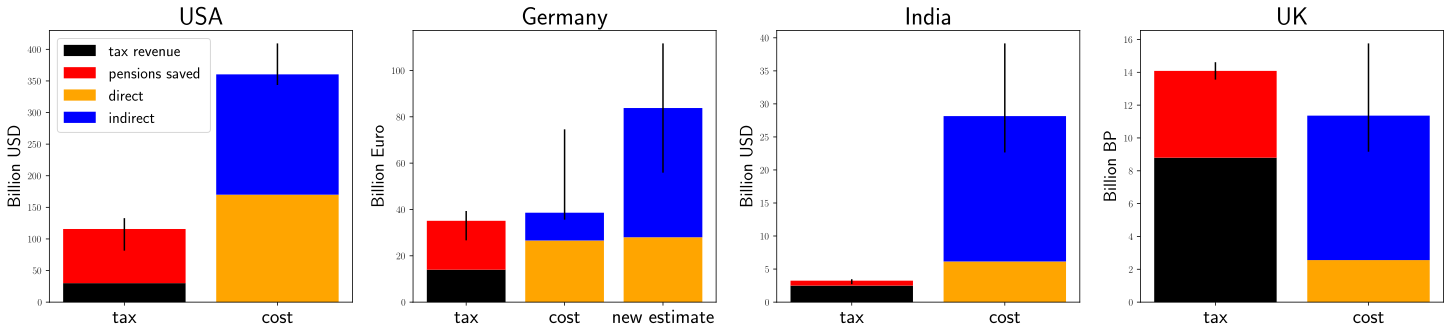

In [16]:
# update plots from above

## plot these numbers in four subplots next to each other

fig, ax = plt.subplots(1,4, figsize=(25,5))
legendsize -=2

# plot USA
x_USA = np.arange(2)
USA_direct_y = np.array([USA_direct_cost_lb, USA_direct_cost, USA_direct_cost_ub])
USA_indirect_y = np.array(3*[USA_indirect_cost])
USA_yerr_pensions = ([0.4*USA_pensions_saved], [0.2*USA_pensions_saved]) #Personal estimates as justified in text 


ax[0].bar(x_USA[0], USA_tax_2018, color='k', label='tax revenue')
ax[0].bar(x_USA[0], USA_pensions_saved, bottom=USA_tax_2018, color='red', 
          label='pensions saved', yerr=USA_yerr_pensions)
ax[0].bar(x_USA[1], USA_direct_cost, color='orange', label='direct')
ax[0].bar(x_USA[1], USA_indirect_cost, bottom=USA_direct_cost, color='blue', 
          label='indirect', yerr=USA_yerr_direct)
ax[0].set_ylabel('Billion USD', fontsize=ylabelsize)
ax[0].set_title('USA', fontsize=titlesize)
ax[0].set_xticks(x_USA)
ax[0].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
ax[0].legend(loc='upper left', prop={'size': legendsize})

# plot Germany
x_Ger = np.arange(3)
Ger_yerr_pensions = ([0.4*Ger_pensions_saved], [0.2*Ger_pensions_saved]) 
#Personal estimates as justified in text 

ax[1].bar(x_Ger[0], Ger_tax_2018, color='k', label='tax revenue')
ax[1].bar(x_Ger[0], Ger_pensions_saved, bottom=Ger_tax_2018, color='red', 
          label='pensions saved', yerr=Ger_yerr_pensions)
ax[1].bar(x_Ger[1], Ger_direct_cost, color='orange', label='direct')
ax[1].bar(x_Ger[1], Ger_indirect_cost, bottom=Ger_direct_cost, color='blue', 
          label='indirect', yerr=Ger_indirect_yerr)
ax[1].bar(x_Ger[2], Ger_direct_cost_other, color='orange')#, label='direct other')
ax[1].bar(x_Ger[2], Ger_indirect_cost_other, bottom=Ger_direct_cost_other,
          color='blue', yerr=Ger_indirect_yerr_other)#, label='indirect other')
ax[1].set_ylabel('Billion Euro', fontsize=ylabelsize)
ax[1].set_title('Germany', fontsize=titlesize)
ax[1].set_xticks(x_Ger)
ax[1].set_xticklabels(['tax', 'cost', 'new estimate'], fontsize=xlabelsize)
#ax[1].legend(loc='upper left', prop={'size': legendsize})

# plot India
x_India = np.arange(2)
India_yerr_pensions = ([0.7*India_pensions_saved], [0.3*India_pensions_saved]) 
#Personal estimates as justified in text 

ax[2].bar(x_India[0], India_tax_2018, color='black', label='tax revenue')
ax[2].bar(x_India[0], India_pensions_saved, bottom=India_tax_2018, color='red',
          label='pensions saved', yerr=India_yerr_pensions)
ax[2].bar(x_India[1], India_direct_cost, color='orange', label='direct')
ax[2].bar(x_India[1], India_indirect_cost, bottom=India_direct_cost, color='blue',
          label='indirect', yerr=India_indirect_yerr)
ax[2].set_ylabel('Billion USD', fontsize=ylabelsize)
ax[2].set_title('India', fontsize=titlesize)
ax[2].set_xticks(x_India)
ax[2].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
#ax[2].legend(loc='upper left', prop={'size': legendsize})

# plot UK
x_UK = np.arange(2)
UK_yerr_pensions = ([0.1*UK_pensions_saved], [0.1*UK_pensions_saved]) 

ax[3].bar(x_UK[0], UK_tax_2018, color='black', label='tax revenue')
ax[3].bar(x_UK[0], UK_pensions_saved, bottom=UK_tax_2018, color='red', 
          label='pensions saved', yerr=UK_yerr_pensions)
ax[3].bar(x_UK[1], UK_direct_cost, color='orange', label='direct')
ax[3].bar(x_UK[1], UK_indirect_cost, bottom=UK_direct_cost, color='blue', 
          label='indirect',  yerr=UK_indirect_yerr)
ax[3].set_ylabel('Billion BP', fontsize=ylabelsize)
ax[3].set_title('UK', fontsize=titlesize)
ax[3].set_xticks(x_UK)
ax[3].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
#ax[3].legend(loc='lower left')

plt.savefig('cigarettes_tax_pensions_simple.png')
plt.show();

# Add the average cost of healthcare for each country

In [12]:
# Use the average spending for healthcare on >= 65 year olds as given in the paper
# Comparison of Health Care Spending by Age in 8 High-Income Countries
# see: https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2769102

# The numbers for 2015 in USD are: US: 24655; Ger: 12442; UK: 9584;
# When translated to the respective currency and accounted for inflation from 2015 to 2018 this yields
USA_cost_health_care_old = 26133
Ger_cost_health_care_old = 10871
UK_cost_health_care_old = 7333

# numbers for India???
# https://www.statista.com/statistics/953150/india-per-capita-public-expenditure-on-health/
# taking the number in rupees translating them into USD and multiplying with 2.5 as that seems to be
# the difference between the average and population older than 65
India_cost_health_care_old = 22.76 * 2.5 
print(India_cost_health_care_old)

56.900000000000006


In [13]:
# compute pensions saved in billion
YLL_smoking = 10

USA_hc_saved = (YLL_smoking * USA_cost_health_care_old * USA_deaths_per_year) / 1000000000
Ger_hc_saved = (YLL_smoking * Ger_cost_health_care_old * Ger_deaths_per_year) / 1000000000
India_hc_saved = (YLL_smoking * India_cost_health_care_old * India_deaths_per_year) / 1000000000
UK_hc_saved = (YLL_smoking * UK_cost_health_care_old * UK_deaths_per_year) / 1000000000

print(USA_hc_saved)
print(Ger_hc_saved)
print(India_hc_saved)
print(UK_hc_saved)

125.4384
13.15391
5.69
5.71974


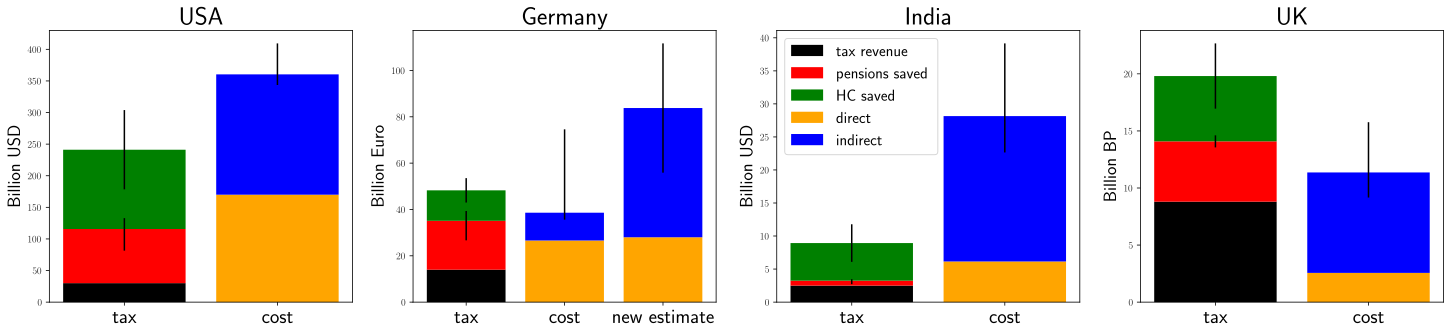

In [17]:
# update plots from above

## plot these numbers in four subplots next to each other

fig, ax = plt.subplots(1,4, figsize=(25,5))

# plot USA
x_USA = np.arange(2)
USA_yerr_hc = ([0.5*USA_hc_saved], [0.5*USA_hc_saved])

ax[0].bar(x_USA[0], USA_tax_2018, color='k', label='tax revenue')
ax[0].bar(x_USA[0], USA_pensions_saved, bottom=USA_tax_2018, color='red', 
          label='pensions saved', yerr=USA_yerr_pensions)
ax[0].bar(x_USA[0], USA_hc_saved, bottom=USA_pensions_saved + USA_tax_2018, color='green',
          label='HC saved', yerr=USA_yerr_hc)
ax[0].bar(x_USA[1], USA_direct_cost, color='orange', label='direct')
ax[0].bar(x_USA[1], USA_indirect_cost, bottom=USA_direct_cost, color='blue', 
          label='indirect', yerr=USA_yerr_direct)
ax[0].set_ylabel('Billion USD', fontsize=ylabelsize)
ax[0].set_title('USA', fontsize=titlesize)
ax[0].set_xticks(x_USA)
ax[0].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
#ax[0].legend(loc='lower right', prop={'size': legendsize})

# plot Germany
x_Ger = np.arange(3)
Ger_yerr_hc = ([0.4*Ger_hc_saved], [0.4*Ger_hc_saved])

ax[1].bar(x_Ger[0], Ger_tax_2018, color='k', label='tax revenue')
ax[1].bar(x_Ger[0], Ger_pensions_saved, bottom=Ger_tax_2018, color='red', 
          label='pensions saved', yerr=Ger_yerr_pensions)
ax[1].bar(x_Ger[0], Ger_hc_saved, bottom=Ger_pensions_saved + Ger_tax_2018, color='green', 
          label='HC saved', yerr=Ger_yerr_hc)
ax[1].bar(x_Ger[1], Ger_direct_cost, color='orange', label='direct')
ax[1].bar(x_Ger[1], Ger_indirect_cost, bottom=Ger_direct_cost, color='blue', 
          label='indirect', yerr=Ger_indirect_yerr)
ax[1].bar(x_Ger[2], Ger_direct_cost_other, color='orange')#, label='direct other')
ax[1].bar(x_Ger[2], Ger_indirect_cost_other, bottom=Ger_direct_cost_other,
          color='blue', yerr=Ger_indirect_yerr_other)#, label='indirect other')ax[1].set_ylabel('Billion Euro')
ax[1].set_ylabel('Billion Euro', fontsize=ylabelsize)
ax[1].set_title('Germany', fontsize=titlesize)
ax[1].set_xticks(x_Ger)
ax[1].set_xticklabels(['tax', 'cost', 'new estimate'], fontsize=xlabelsize)
#ax[1].legend(loc='upper left', prop={'size': legendsize})

# plot India
x_India = np.arange(2)
India_yerr_hc = ([0.5*India_hc_saved], [0.5*India_hc_saved])

ax[2].bar(x_India[0], India_tax_2018, color='black', label='tax revenue')
ax[2].bar(x_India[0], India_pensions_saved, bottom=India_tax_2018, color='red',
          label='pensions saved', yerr=India_yerr_pensions)
ax[2].bar(x_India[0], India_hc_saved, bottom=India_pensions_saved + India_tax_2018, color='green', 
          label='HC saved', yerr=India_yerr_hc)
ax[2].bar(x_India[1], India_direct_cost, color='orange', label='direct')
ax[2].bar(x_India[1], India_indirect_cost, bottom=India_direct_cost, color='blue',
          label='indirect', yerr=India_indirect_yerr)
ax[2].set_ylabel('Billion USD', fontsize=ylabelsize)
ax[2].set_title('India', fontsize=titlesize)
ax[2].set_xticks(x_India)
ax[2].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
ax[2].legend(loc='upper left', prop={'size': legendsize})

# plot UK
x_UK = np.arange(2)
UK_yerr_hc = ([0.5*UK_hc_saved], [0.5*UK_hc_saved])

ax[3].bar(x_UK[0], UK_tax_2018, color='black', label='tax revenue')
ax[3].bar(x_UK[0], UK_pensions_saved, bottom=UK_tax_2018, color='red', 
          label='pensions saved', yerr=UK_yerr_pensions)
ax[3].bar(x_UK[0], UK_hc_saved, bottom=UK_pensions_saved + UK_tax_2018, color='green', 
          label='HC saved', yerr=UK_yerr_hc)
ax[3].bar(x_UK[1], UK_direct_cost, color='orange', label='direct')
ax[3].bar(x_UK[1], UK_indirect_cost, bottom=UK_direct_cost, color='blue', 
          label='indirect',  yerr=UK_indirect_yerr)
ax[3].set_ylabel('Billion BP', fontsize=ylabelsize)
ax[3].set_title('UK', fontsize=titlesize)
ax[3].set_xticks(x_UK)
ax[3].set_xticklabels(['tax', 'cost'], fontsize=xlabelsize)
#ax[3].legend(loc='lower left', prop={'size': legendsize})

plt.savefig('cigarettes_tax_pensions_hc_simple.png')
plt.show();

# Estimate the Pensions saved - complex (not featured - too vague)

In [14]:
death_rates_by_age_df = pd.read_csv('death-rates-smoking-age.csv')
death_rates_by_age_df.head(5)

,Entity,Code,Year,Deaths - Smoking - Sex: Both - Age: All Ages (Rate),Deaths - Smoking - Sex: Both - Age: 15-49 years (Rate),Deaths - Smoking - Sex: Both - Age: 50-69 years (Rate),Deaths - Smoking - Sex: Both - Age: 70+ years (Rate),Deaths - Smoking - Sex: Both - Age: Under 5 (Rate),Deaths - Smoking - Sex: Both - Age: 5-14 years (Rate)
0,Afghanistan,AFG,1990,63.895905,16.589519,267.230009,679.006755,NaN,NaN
1,Afghanistan,AFG,1991,61.846347,15.456913,266.975516,677.617648,NaN,NaN
2,Afghanistan,AFG,1992,53.436511,12.767999,266.430053,679.505810,NaN,NaN
3,Afghanistan,AFG,1993,47.044347,11.000425,267.969428,683.973588,NaN,NaN
4,Afghanistan,AFG,1994,45.799808,10.738020,272.403687,691.007773,NaN,NaN


In [15]:
# select year 2017 and our countries

death_rates_by_age_2017_df = death_rates_by_age_df[death_rates_by_age_df['Year'] == 2017]
USA_death_rates_by_age_2017_df = death_rates_by_age_2017_df[death_rates_by_age_2017_df['Entity'] == 'United States']
Ger_death_rates_by_age_2017_df = death_rates_by_age_2017_df[death_rates_by_age_2017_df['Entity'] == 'Germany']
UK_death_rates_by_age_2017_df = death_rates_by_age_2017_df[death_rates_by_age_2017_df['Entity'] == 'United Kingdom']
India_death_rates_by_age_2017_df = death_rates_by_age_2017_df[death_rates_by_age_2017_df['Entity'] == 'India']

In [16]:
# import age bracket data for the USA
# manually transferred from Wikipedia: https://en.wikipedia.org/wiki/Demographics_of_the_United_States
USA_age_brackets = ['0-14', '15-24', '25-54', '55-64', '65+']
USA_population_by_age = [61175933, 43351778,  128863172, 42179856, 51055052]

In [17]:
# import age bracket data for Germany
# manually transferred from https://www.statista.com/statistics/454349/population-by-age-group-germany/
# how ridiculous is their pricing to download a file??
Ger_age_brackets = ['0-14', '15-24', '25-59', '60-64', '65+']
Ger_population_by_age = [10.65, 9.29, 39.46, 5.65, 18.09]

In [18]:
# import age bracket data for the UK
# manually transferred from https://www.statista.com/statistics/281174/uk-population-by-age/
# because of their pricing
UK_age_brackets = ['0-14', '15-24', '25-54', '55-64', '65+']
UK_population_by_age = [11.96, 7.81, 26.49, 8.17, 12.39]

In [19]:
# import age bracket data for India
# manually transferred from Wikipedia: https://en.wikipedia.org/wiki/Demographics_of_India
India_age_brackets = ['0-14', '15-24', '25-54', '55-64', '55-64', '65+']
India_population_by_age = [372444116, 231950671, 458975293, 76809762, 66185333]

In [20]:
# plot the different age brackets as bar plots

## plot these numbers in four subplots next to each other

fig, ax = plt.subplots(1,4, figsize=(20,5))

# plot USA
x_USA = np.arange(5)

ax[0].bar(x_USA, USA_population_by_age, color='blue')
ax[0].set_ylabel('population')
ax[0].set_title('USA')
ax[0].set_xticks(x_USA)
ax[0].set_xticklabels(USA_age_brackets)

# plot Germany
x_Ger = np.arange(5)

ax[1].bar(x_Ger, Ger_population_by_age, color='gold')
ax[1].set_ylabel('Population in Mio')
ax[1].set_title('Ger')
ax[1].set_xticks(x_Ger)
ax[1].set_xticklabels(Ger_age_brackets)

# plot India
x_India = np.arange(5)

ax[2].bar(x_India, India_population_by_age, color='orange')
ax[2].set_ylabel('population')
ax[2].set_title('India')
ax[2].set_xticks(x_India)
ax[2].set_xticklabels(India_age_brackets)

# plot UK
x_UK = np.arange(5)

ax[3].bar(x_UK, UK_population_by_age, color='blue')
ax[3].set_ylabel('population in Mio')
ax[3].set_title('UK')
ax[3].set_xticks(x_UK)
ax[3].set_xticklabels(UK_age_brackets)

plt.savefig('age_brackets.pdf')
plt.show();

KeyboardInterrupt: 

In [ ]:
USA_death_rates_by_age_2017_df

In [ ]:
# plot the different rates of death from cigarettes by age brackets as bar plots

## plot these numbers in four subplots next to each other

fig, ax = plt.subplots(1,4, figsize=(20,5))
death_rate_brackets = ['0-14', '15-49', '50-69', '70+']

# plot USA
x_USA = np.arange(4)
USA_death_rates_0_14 = 0
USA_death_rates_15_49 = USA_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 15-49 years (Rate)']
USA_death_rates_50_69 = USA_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 50-69 years (Rate)']
USA_death_rates_70_plus = USA_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 70+ years (Rate)']
USA_death_rates_by_age = [USA_death_rates_0_14, USA_death_rates_15_49, USA_death_rates_50_69, USA_death_rates_70_plus]

ax[0].bar(x_USA, USA_death_rates_by_age, color='blue')
ax[0].set_ylabel('rate of death per 100k')
ax[0].set_title('USA')
ax[0].set_xticks(x_USA)
ax[0].set_xticklabels(death_rate_brackets)

# plot Germany
x_Ger = np.arange(4)
Ger_death_rates_0_14 = 0
Ger_death_rates_15_49 = Ger_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 15-49 years (Rate)']
Ger_death_rates_50_69 = Ger_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 50-69 years (Rate)']
Ger_death_rates_70_plus = Ger_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 70+ years (Rate)']
Ger_death_rates_by_age = [Ger_death_rates_0_14, Ger_death_rates_15_49, Ger_death_rates_50_69, Ger_death_rates_70_plus]

ax[1].bar(x_Ger, Ger_death_rates_by_age, color='gold')
ax[1].set_ylabel('rate of death per 100k')
ax[1].set_title('Germany')
ax[1].set_xticks(x_Ger)
ax[1].set_xticklabels(death_rate_brackets)

# plot India
x_India = np.arange(4)
India_death_rates_0_14 = 0
India_death_rates_15_49 = India_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 15-49 years (Rate)']
India_death_rates_50_69 = India_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 50-69 years (Rate)']
India_death_rates_70_plus = India_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 70+ years (Rate)']
India_death_rates_by_age = [India_death_rates_0_14, India_death_rates_15_49, India_death_rates_50_69, India_death_rates_70_plus]

ax[2].bar(x_India, India_death_rates_by_age, color='orange')
ax[2].set_ylabel('rate of death per 100k')
ax[2].set_title('India')
ax[2].set_xticks(x_India)
ax[2].set_xticklabels(death_rate_brackets)

# plot UK
x_UK = np.arange(4)
UK_death_rates_0_14 = 0
UK_death_rates_15_49 = UK_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 15-49 years (Rate)']
UK_death_rates_50_69 = UK_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 50-69 years (Rate)']
UK_death_rates_70_plus = UK_death_rates_by_age_2017_df['Deaths - Smoking - Sex: Both - Age: 70+ years (Rate)']
UK_death_rates_by_age = [UK_death_rates_0_14, UK_death_rates_15_49, UK_death_rates_50_69, UK_death_rates_70_plus]

ax[3].bar(x_UK, UK_death_rates_by_age, color='red')
ax[3].set_ylabel('rate of death per 100k')
ax[3].set_title('UK')
ax[3].set_xticks(x_UK)
ax[3].set_xticklabels(death_rate_brackets)

plt.savefig('death_rate_age_brackets.pdf')
plt.show();

In [ ]:
# estimate the number of deaths by age group

# since the age brackets of death rates from smoking and actual population don't really overlap
# I have to match them in a slightly different way. 
# I will merge the 15-24 and 25-54 age brackets and multiply them with the 15-49 age group. 
# the 54-65 age group will be multiplied with the 50-69 bracket for death rates
# the 65+ age group will be multiplied with the 70+ bracket for death rates

# USA
USA_deaths_young_adults = 1/100000 * USA_death_rates_15_49.values * (USA_population_by_age[1] + USA_population_by_age[2])
USA_deaths_old_adults = 1/100000 * USA_death_rates_50_69.values * USA_population_by_age[3]
USA_deaths_seniors = 1/100000 * USA_death_rates_70_plus.values * USA_population_by_age[4]

# Ger
Ger_deaths_young_adults = 10 * Ger_death_rates_15_49.values * (Ger_population_by_age[1] + Ger_population_by_age[2])
Ger_deaths_old_adults = 10 * Ger_death_rates_50_69.values * Ger_population_by_age[3]
Ger_deaths_seniors = 10 * Ger_death_rates_70_plus.values * Ger_population_by_age[4]

# India
India_deaths_young_adults = 1/100000 * India_death_rates_15_49.values * (India_population_by_age[1] + India_population_by_age[2])
India_deaths_old_adults = 1/100000 * India_death_rates_50_69.values * India_population_by_age[3]
India_deaths_seniors = 1/100000 * India_death_rates_70_plus.values * India_population_by_age[4]

# UK
UK_deaths_young_adults = 10 * UK_death_rates_15_49.values * (UK_population_by_age[1] + UK_population_by_age[2])
UK_deaths_old_adults = 10 * UK_death_rates_50_69.values * UK_population_by_age[3]
UK_deaths_seniors = 10 * UK_death_rates_70_plus.values * UK_population_by_age[4]

In [ ]:
print(USA_deaths_young_adults)
print(USA_deaths_old_adults)
print(USA_deaths_seniors)